In [1]:
import sys
from pathlib import Path

sys.path.insert(0, "/share/home/ychi/dev/sperm_struct/notebooks")

import h2 as h
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from hic_basic.hicio import load_pickle
from lib.metrics import stack_contour, plate2df
from lib.plot import plot_figure_canvas
from umap import UMAP


In [2]:
bfs = (h.ddir / "Sperm_hg_round1").with_suffix(
    ".round1.dv_ft.bfs.pkl"
    )
bfs = pd.read_pickle(bfs)

silhoutte = bfs["density"].clip(upper=1).fillna(0)
silhoutte_contour = silhoutte.apply(stack_contour, axis=0)

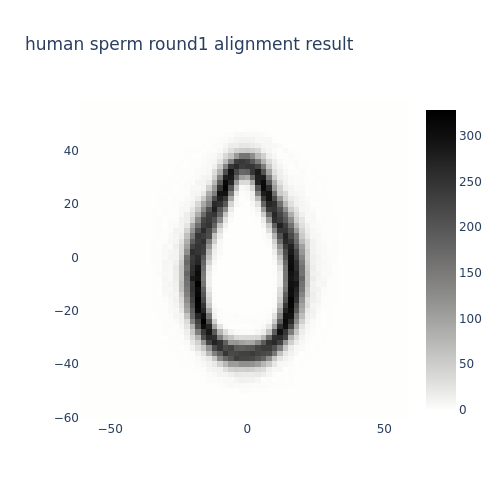

In [3]:
fig = plot_figure_canvas(
    silhoutte_contour.sum(axis=1).unstack(),
    square_size=60,
    fill=0,
    cmap="gray_r"
)
fig.update_layout(
    title = "human sperm round1 alignment result"
)
fig.show(renderer= "png")